### 1. Importar as bibliotecas necessárias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 2. Carregar os dados do arquivo horasDeEstudos.csv;

In [2]:
df_horas_estudos = pd.read_csv('./archives/horasEstudos.csv')

### 3. Visualizar algumas informações básicas do dataframe:

In [25]:
df_horas_estudos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### 4. Gerar uma análise exploratória dos dados:

In [13]:
# Resumo estatístico do dataframe;
df_horas_estudos.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [16]:
# Analisar a correlação entre as variáveis
x = df_horas_estudos['horas_estudo_mes'].values
y = df_horas_estudos['salario'].values

print(np.corrcoef(x, y))

df_horas_estudos.corr()

[[1.         0.81857565]
 [0.81857565 1.        ]]


,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


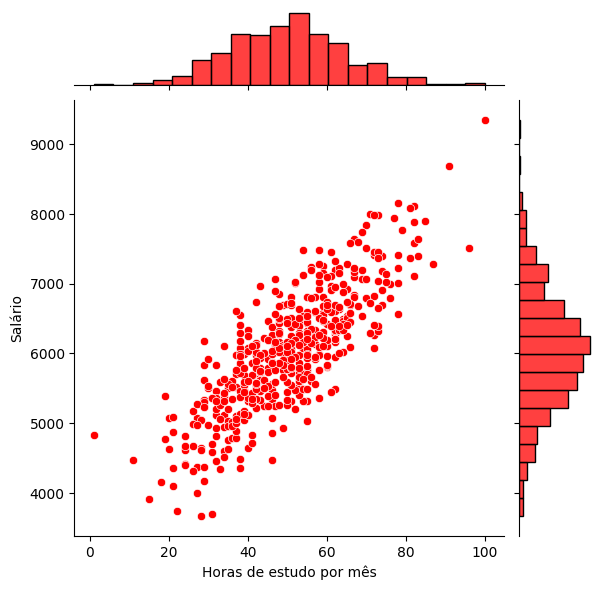

In [14]:
'''
Crie os gráficos de dispersão, jointplot e pairplot para demonstrar
a correlação entre as variáveis;
'''
sns.jointplot(data=df_horas_estudos, x='horas_estudo_mes', y='salario', color='red')

plt.xlabel('Horas de estudo por mês')

plt.ylabel('Salário')

plt.show()

In [ ]:
'''
Analisar a distribuição das informações da variável preditora (X)
com um histograma;
'''

### 5. Preparação dos dados:

In [24]:
'''
Preparar a variável de entrada (X), convertendo-a em um array.
Utilize a função np.array.
'''
x = df_horas_estudos[['horas_estudo_mes']].values

# Verifique o tipo de informação, utilizando a função type;
print(f'Tipo da variável x: {type(x)}')
print(f'Quantidade da variável x: {len(x)}')

'''
Crie uma variável chamada y e atribua a ela a coluna salário do
dataframe.
'''
y = df_horas_estudos[['salario']].values

Tipo da variável x: <class 'numpy.ndarray'>
Quantidade da variável x: 500


### 6. Separação dos dados em treino e teste:

In [28]:
'''
Separe os dados em treino e teste, utilizando o comando
train_teste_split. Adote como tamanho da amostra de treino como
sendo 20% e Random_state igual a 42;
'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state=42)

# Analise o tamanho das variáveis de treino e teste.
print(f'x_train: {len(x_train)}')
print(f'x_test: {len(x_test)}')

x_train: 375
x_test: 125


### 7. Treinamento do modelo:

In [29]:
'''
Crie o modelo de regressão linear simples. modelo =
LinearRegression ();
'''
model = LinearRegression()

In [30]:
'''
Treino o modelo com as variáveis X_train e y_train.
modelo.fit(X_train, y_train);
'''
model.fit(x_train, y_train)

LinearRegression()

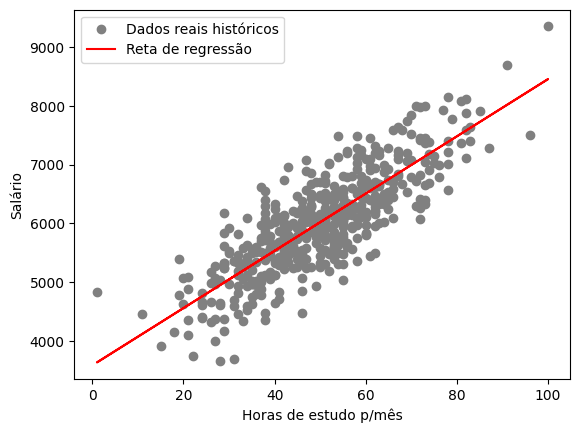

In [39]:
'''
Visualize a reta de regressão linear (previsões) e os dados reais
utilizados no treinamento. Utilize os comandos abaixo:
'''
plt.scatter(x, y, color='gray', label='Dados reais históricos')

plt.plot(x, model.predict(x), color='red', label='Reta de regressão')

plt.xlabel('Horas de estudo p/mês')

plt.ylabel('Salário')

plt.legend(loc='upper left')

plt.show()

In [41]:
'''
Avaliar o modelo nos dados de teste, calculando o coeficiente R².
Utilize o comando modelo.score(X_teste, y_teste)
'''
print(f'Pontuação do modelo: {model.score(x_test, y_test)}')

Pontuação do modelo: 0.5671465188809721


In [44]:
'''
Calcule os coeficientes a e b da equação. Utilize os comandos
modelo.intercept_ e modelo.coef_.
'''
print(f'Coeficiente angular (a): {model.coef_}')
print(f'Coeficiente linear (b) {model.intercept_}')

Coeficiente angular (a): [[48.6259101]]
Coeficiente linear (b) [3588.3237553]


### 8. Deploy do modelo:

In [55]:
'''
Faça três testes com os valores a seguir: 48, 65 e 73
'''
print(f'Salário para 48 horas de estudo: R$ {model.predict([[48]]).round(2)[0][0]}')
print(f'Salário para 65 horas de estudo: R$ {model.predict([[65]]).round(2)[0][0]}')
print(f'Salário para 73 horas de estudo: R$ {model.predict([[73]]).round(2)[0][0]}')

Salário para 48 horas de estudo: R$ 5922.37
Salário para 65 horas de estudo: R$ 6749.01
Salário para 73 horas de estudo: R$ 7138.02


In [56]:
from modules import inputInt

In [67]:
'''
Crie um código para solicitar ao usuário a inserção da quantidade
horas estudadas e retorne a previsão do salário
'''
qnta_hours = inputInt('Quantas horas você estuda por mês?: ')

print(f'Salário para {qnta_hours} horas de estudo: R$ {model.predict([[qnta_hours]]).round(2)[0][0]}')

Salário para 96 horas de estudo: R$ 8256.41
